<a href="https://colab.research.google.com/github/Diksha-Bora/Data-Science-project/blob/main/RandomForest22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MODEL COMPARISION WITH ENSEMBLE TECHNIQUE

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("/content/mnist_train_small.csv",header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,775,776,777,778,779,780,781,782,783,784
0,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [3]:
data[0].unique()

array([6, 5, 7, 9, 2, 0, 8, 3, 4, 1])

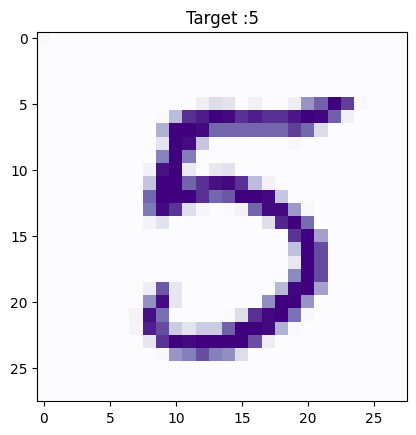

In [4]:
row = np.random.randint(0,10)
imgarr = np.array(data.iloc[row,:-1]).reshape((28,28))
plt.imshow(imgarr,cmap='Purples')
plt.title(f"Target :{data[0][row]}")
plt.show()

In [5]:
data[0].value_counts()

1    2243
7    2126
6    2039
9    2023
3    2021
2    1989
0    1962
4    1924
8    1912
5    1761
Name: 0, dtype: int64

In [6]:
x = data.drop(0,axis=1)
y = data[0]

In [7]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

BASE MODELS 

# LOGISTIC REGRESSION 

In [8]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(max_iter=15)
log_reg.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=15)

In [9]:
y_pred_train_log_reg = log_reg.predict(x_train)
y_pred_test_log_reg = log_reg.predict(x_test)

In [10]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_log_reg))
print("TEST : \n",classification_report(y_test,y_pred_test_log_reg))

TRAIN : 
               precision    recall  f1-score   support

           0       0.95      0.95      0.95      1570
           1       0.94      0.96      0.95      1794
           2       0.90      0.88      0.89      1591
           3       0.87      0.88      0.87      1617
           4       0.90      0.91      0.91      1539
           5       0.88      0.83      0.85      1409
           6       0.94      0.95      0.94      1631
           7       0.94      0.92      0.93      1701
           8       0.86      0.88      0.87      1530
           9       0.88      0.89      0.89      1618

    accuracy                           0.91     16000
   macro avg       0.91      0.91      0.91     16000
weighted avg       0.91      0.91      0.91     16000

TEST : 
               precision    recall  f1-score   support

           0       0.94      0.98      0.96       392
           1       0.94      0.97      0.95       449
           2       0.90      0.87      0.88       398
     

# DECISION TREE 

In [11]:
from sklearn.tree import DecisionTreeClassifier 
dtc = DecisionTreeClassifier(criterion="gini",max_depth =15)
dtc.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=15)

In [12]:
y_pred_train_dtc = dtc.predict(x_train)
y_pred_test_dtc = dtc.predict(x_test)

In [13]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_dtc))
print("TEST : \n",classification_report(y_test,y_pred_test_dtc))

TRAIN : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1570
           1       0.99      1.00      0.99      1794
           2       0.99      0.99      0.99      1591
           3       1.00      0.99      0.99      1617
           4       0.99      0.99      0.99      1539
           5       1.00      0.99      0.99      1409
           6       0.99      1.00      0.99      1631
           7       0.99      0.99      0.99      1701
           8       0.99      0.99      0.99      1530
           9       0.98      0.98      0.98      1618

    accuracy                           0.99     16000
   macro avg       0.99      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000

TEST : 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       392
           1       0.91      0.93      0.92       449
           2       0.74      0.79      0.77       398
     

# K - NEAREST NEIGHBOUR

In [14]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [15]:
y_pred_train_knn = knn.predict(x_train)
y_pred_test_knn = knn.predict(x_test)

In [16]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_knn))
print("TEST : \n",classification_report(y_test,y_pred_test_knn))

TRAIN : 
               precision    recall  f1-score   support

           0       0.98      1.00      0.99      1570
           1       0.96      1.00      0.98      1794
           2       0.98      0.97      0.98      1591
           3       0.98      0.97      0.98      1617
           4       0.98      0.97      0.98      1539
           5       0.98      0.98      0.98      1409
           6       0.99      0.99      0.99      1631
           7       0.98      0.98      0.98      1701
           8       0.99      0.95      0.97      1530
           9       0.97      0.98      0.97      1618

    accuracy                           0.98     16000
   macro avg       0.98      0.98      0.98     16000
weighted avg       0.98      0.98      0.98     16000

TEST : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.98       392
           1       0.94      1.00      0.97       449
           2       0.98      0.92      0.95       398
     

# SVM 

In [17]:
from sklearn.svm import SVC
svc = SVC(kernel="rbf")
svc.fit(x_train,y_train)

SVC()

In [18]:
y_pred_train_svc = svc.predict(x_train)
y_pred_test_svc = svc.predict(x_test)

In [19]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_svc))
print("TEST : \n",classification_report(y_test,y_pred_test_svc))

TRAIN : 
               precision    recall  f1-score   support

           0       0.99      1.00      1.00      1570
           1       0.99      0.99      0.99      1794
           2       0.99      0.99      0.99      1591
           3       0.98      0.97      0.98      1617
           4       0.98      0.99      0.98      1539
           5       0.99      0.99      0.99      1409
           6       1.00      0.99      0.99      1631
           7       0.98      0.98      0.98      1701
           8       0.98      0.99      0.99      1530
           9       0.99      0.97      0.98      1618

    accuracy                           0.99     16000
   macro avg       0.99      0.99      0.99     16000
weighted avg       0.99      0.99      0.99     16000

TEST : 
               precision    recall  f1-score   support

           0       0.98      0.99      0.99       392
           1       0.98      0.99      0.98       449
           2       0.96      0.95      0.95       398
     

# NAIVE BAYES 

In [20]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB(force_alpha=True)
mnb.fit(x_train,y_train)

MultinomialNB(force_alpha=True)

In [21]:
y_pred_train_mnb = mnb.predict(x_train)
y_pred_test_mnb = mnb.predict(x_test)

In [22]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_mnb))
print("TEST : \n",classification_report(y_test,y_pred_test_mnb))

TRAIN : 
               precision    recall  f1-score   support

           0       0.91      0.90      0.91      1570
           1       0.88      0.93      0.91      1794
           2       0.87      0.83      0.85      1591
           3       0.79      0.81      0.80      1617
           4       0.83      0.74      0.78      1539
           5       0.88      0.66      0.76      1409
           6       0.89      0.92      0.90      1631
           7       0.95      0.83      0.89      1701
           8       0.66      0.78      0.72      1530
           9       0.69      0.84      0.76      1618

    accuracy                           0.83     16000
   macro avg       0.84      0.82      0.83     16000
weighted avg       0.84      0.83      0.83     16000

TEST : 
               precision    recall  f1-score   support

           0       0.93      0.93      0.93       392
           1       0.88      0.93      0.90       449
           2       0.86      0.79      0.83       398
     

RANDOM FOREST - ENSEMBLE TECHNIQUE

In [39]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=150,criterion="entropy",max_depth=15,bootstrap=True,n_jobs=-1,random_state=76)  # n_jobs allows parallel processing i.e threading 
rfc.fit(x_train,y_train)

RandomForestClassifier(criterion='entropy', max_depth=15, n_estimators=150,
                       n_jobs=-1, random_state=76)

In [40]:
y_pred_train_rfc = rfc.predict(x_train)
y_pred_test_rfc = rfc.predict(x_test)

In [41]:
from sklearn.metrics import classification_report
print("TRAIN : \n",classification_report(y_train,y_pred_train_rfc))
print("TEST : \n",classification_report(y_test,y_pred_test_rfc))

TRAIN : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1570
           1       1.00      1.00      1.00      1794
           2       1.00      1.00      1.00      1591
           3       1.00      1.00      1.00      1617
           4       1.00      1.00      1.00      1539
           5       1.00      1.00      1.00      1409
           6       1.00      1.00      1.00      1631
           7       1.00      1.00      1.00      1701
           8       1.00      1.00      1.00      1530
           9       1.00      1.00      1.00      1618

    accuracy                           1.00     16000
   macro avg       1.00      1.00      1.00     16000
weighted avg       1.00      1.00      1.00     16000

TEST : 
               precision    recall  f1-score   support

           0       0.96      0.99      0.97       392
           1       0.97      0.99      0.98       449
           2       0.94      0.92      0.93       398
     